In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Read the dataset
dataset = pd.read_csv(r"C:\Users\jayso\OneDrive - Howard University\Howard\Summer 2023\PARADIM\API\NewAllE_cleaned.csv", header=None)

# Get the non-numeric columns
categorical_columns = dataset.select_dtypes(exclude=["number"]).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns
for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Separate the input (X) and output (y) columns
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Now, X contains the converted categorical columns as integers
# print(X)


# Split up the Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=31)



In [2]:
from sklearn.linear_model import LinearRegression


# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)


In [5]:
import xgboost as xgb

# Create the Linear Regression model
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

In [14]:
import xgboost as xgb

# Create the XGBoost Regressor model
model = xgb.XGBRegressor()

# Define the parameters you want to set
new_params = {
    'objective': 'reg:squarederror',  # Objective function for regression
    'eval_metric': 'rmse',  # Evaluation metric for regression
    'max_depth': 24,  # Maximum depth of each tree
    'min_child_weight': 1,
    'colsample_bytree': 0.50,
    'learning_rate': 0.02,  # Learning rate
    'n_estimators': 350  # Number of trees (boosting rounds)
}

# Set the parameters using the set_params() method
model.set_params(**new_params)

# Train the model with the updated parameters
model.fit(X_train, y_train)

# Predict using the trained model with the updated parameters
y_pred = model.predict(X_test)


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest regression model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 0.1911794599520393
Root Mean Squared Error (RMSE): 0.43724073455253376
R-squared Score: 0.8657266222655374


In [24]:
# Using iloc to index a row by position
row_position = X.iloc[58622].tolist()
print(row_position)


[49.0, 49.0, 20.0, 18.0, 15.0, 10.0, 4.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


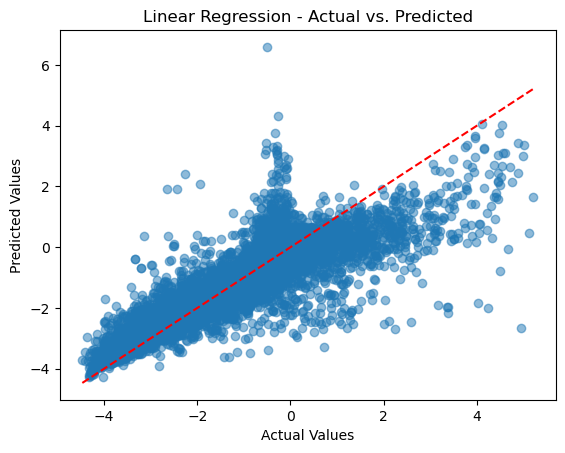

In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Actual vs. Predicted')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show the plot
plt.show()


In [25]:
# Enter the inputs for prediction
input_data = np.array([[38.0, 47.0, 49.0, 18.0, 15.0, 10.0, 4.0, 1.0, 0.0, 0.0, 1.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [38.0, 47.0, 49.0, 18.0, 15.0, 10.0, 4.0, 1.0, 0.0, 0.0, 2.0, 1.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [38.0, 47.0, 49.0, 18.0, 15.0, 10.0, 4.0, 1.0, 0.0, 0.0, 3.0, 2.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [38.0, 47.0, 49.0, 18.0, 15.0, 10.0, 4.0, 1.0, 0.0, 0.0, 4.0, 3.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                      ,[38.0, 49.0, 20.0, 18.0, 15.0, 10.0, 4.0, 1.0, 0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [49.0, 49.0, 20.0, 18.0, 15.0, 10.0, 4.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])  # Replace input_value1, input_value2, ... with your actual input values

# Make predictions using the trained model
predictions = model.predict(input_data)

# Print the predictions
print("Predictions:", predictions)


Predictions: [-2.4809086  -2.8460763  -2.5861228  -2.7174733  -3.1236193  -0.45731074]
